### Importing Libraries

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Imputer
sns.set() # setting seaborn default for plots
%matplotlib inline

In [71]:
# loading Titanic dataset
df=pd.read_csv('https://gist.githubusercontent.com/avmain/284b549eabc13061ce2b0b58b163c7f9/raw/ff20885745fea9ab5be6e900aad4c2cb1d08f936/titanic_data_set.csv',error_bad_lines=False)

In [72]:
df.shape

(891, 12)

In [73]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [85]:
df.describe()

,Survived,Pclass,Sex,Age,Fare,Embarked_0,Embarked_1,Embarked_2,FamilySize
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.699118,32.204208,0.188552,0.086420,0.725028,0.904602
std,0.486592,0.836071,0.477990,13.002015,49.693429,0.391372,0.281141,0.446751,1.613459
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,7.910400,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,1.000000,29.699118,14.454200,0.000000,0.000000,1.000000,0.000000
75%,1.000000,3.000000,1.000000,35.000000,31.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,3.000000,1.000000,80.000000,512.329200,1.000000,1.000000,1.000000,10.000000


### using Class Imputer to fill missing values of age with strategy: mean 

In [78]:
age_imputer = Imputer(missing_values='NaN', strategy='mean', axis=0)
age_imputer = age_imputer.fit(df.iloc[ : , [5]])
df.iloc[:, [5]] = age_imputer.transform(df.iloc[:, [5]])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Replacing the missing values with class with maximum frequency for Embarked

In [79]:
# Maximum count in Embarked
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [80]:
df['Embarked'] = df['Embarked'].fillna('S')
df.Embarked.value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

### Taking care for categorical data 

In [81]:
# Encoding Sex
labelencoder_sex = LabelEncoder()
df.iloc[:, [4]] = labelencoder_sex.fit_transform(df.iloc[:, [4]])


# Encoding Embarked
labelencoder = LabelEncoder()
df.iloc[:, [11]] = labelencoder.fit_transform(df.iloc[:, [11]])
df = pd.get_dummies(df, columns=['Embarked'])
df.head()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_0,Embarked_1,Embarked_2
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0,0,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,0,0,1


### adding feature FamilySize

In [82]:
df['FamilySize'] = df['SibSp'] + df['Parch'] 
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_0,Embarked_1,Embarked_2,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1,0,0,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0,0,1,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,0,0,1,0


### Dropping unneccessary features

In [83]:
df=df.drop(['Name'],axis=1)
df=df.drop(['PassengerId'],axis=1)
df=df.drop(['SibSp'],axis=1)
df=df.drop(['Parch'],axis=1)
df=df.drop(['Ticket'],axis=1)
df.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked_0,Embarked_1,Embarked_2,FamilySize
0,0,3,1,22.0,7.2500,NaN,0,0,1,1
1,1,1,0,38.0,71.2833,C85,1,0,0,1
2,1,3,0,26.0,7.9250,NaN,0,0,1,0
3,1,1,0,35.0,53.1000,C123,0,0,1,1
4,0,3,1,35.0,8.0500,NaN,0,0,1,0


### Exporting dataframe to a new csv file named as titanic_prepared_data.csv

In [84]:
df.to_csv('titanic_prepared_data.csv', index=False)
df = pd.read_csv('titanic_prepared_data.csv')
df.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked_0,Embarked_1,Embarked_2,FamilySize
0,0,3,1,22.0,7.2500,NaN,0,0,1,1
1,1,1,0,38.0,71.2833,C85,1,0,0,1
2,1,3,0,26.0,7.9250,NaN,0,0,1,0
3,1,1,0,35.0,53.1000,C123,0,0,1,1
4,0,3,1,35.0,8.0500,NaN,0,0,1,0


### Univariate Analysis

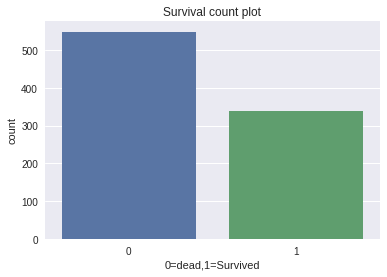

In [59]:
p=sns.countplot(x='Survived',data=df)
p.set_xlabel('0=dead,1=Survived')
p.set_title('Survival count plot')
sns.despine()

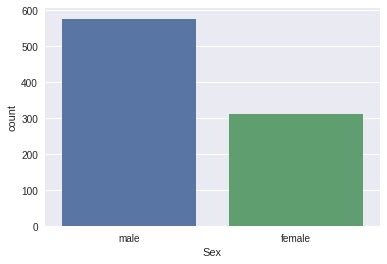

In [60]:
sns.countplot(x='Sex',data=df)

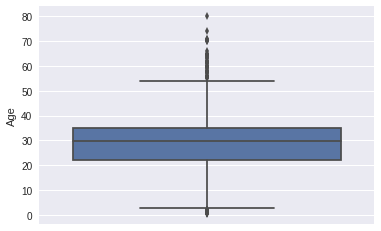

In [61]:
sns.boxplot(y='Age',data=df)

In [62]:
df.Age.describe()

count    889.000000
mean      29.653446
std       12.968366
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64

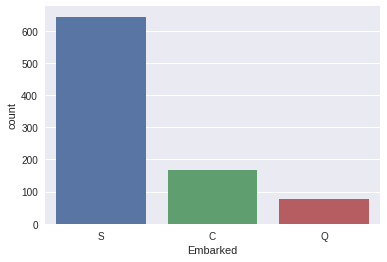

In [63]:
p=sns.countplot(x='Embarked',data=df)

### Bivariate Analysis

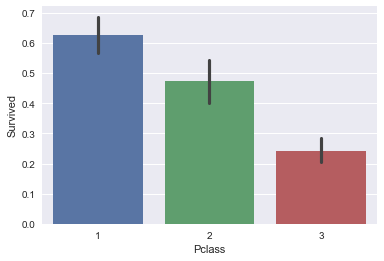

In [17]:
sns.barplot(x='Pclass', y='Survived', data=df)


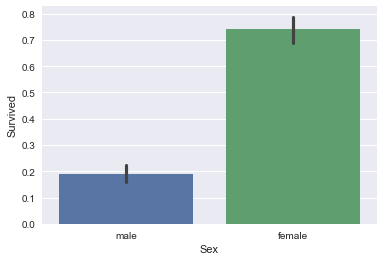

In [18]:
sns.barplot(x='Sex', y='Survived', data=df)


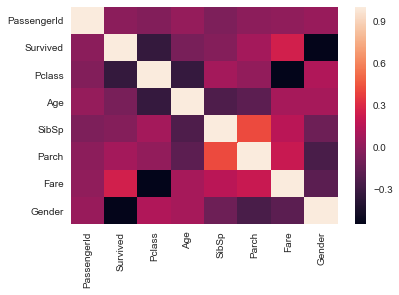

In [19]:
sns.heatmap(df.corr())

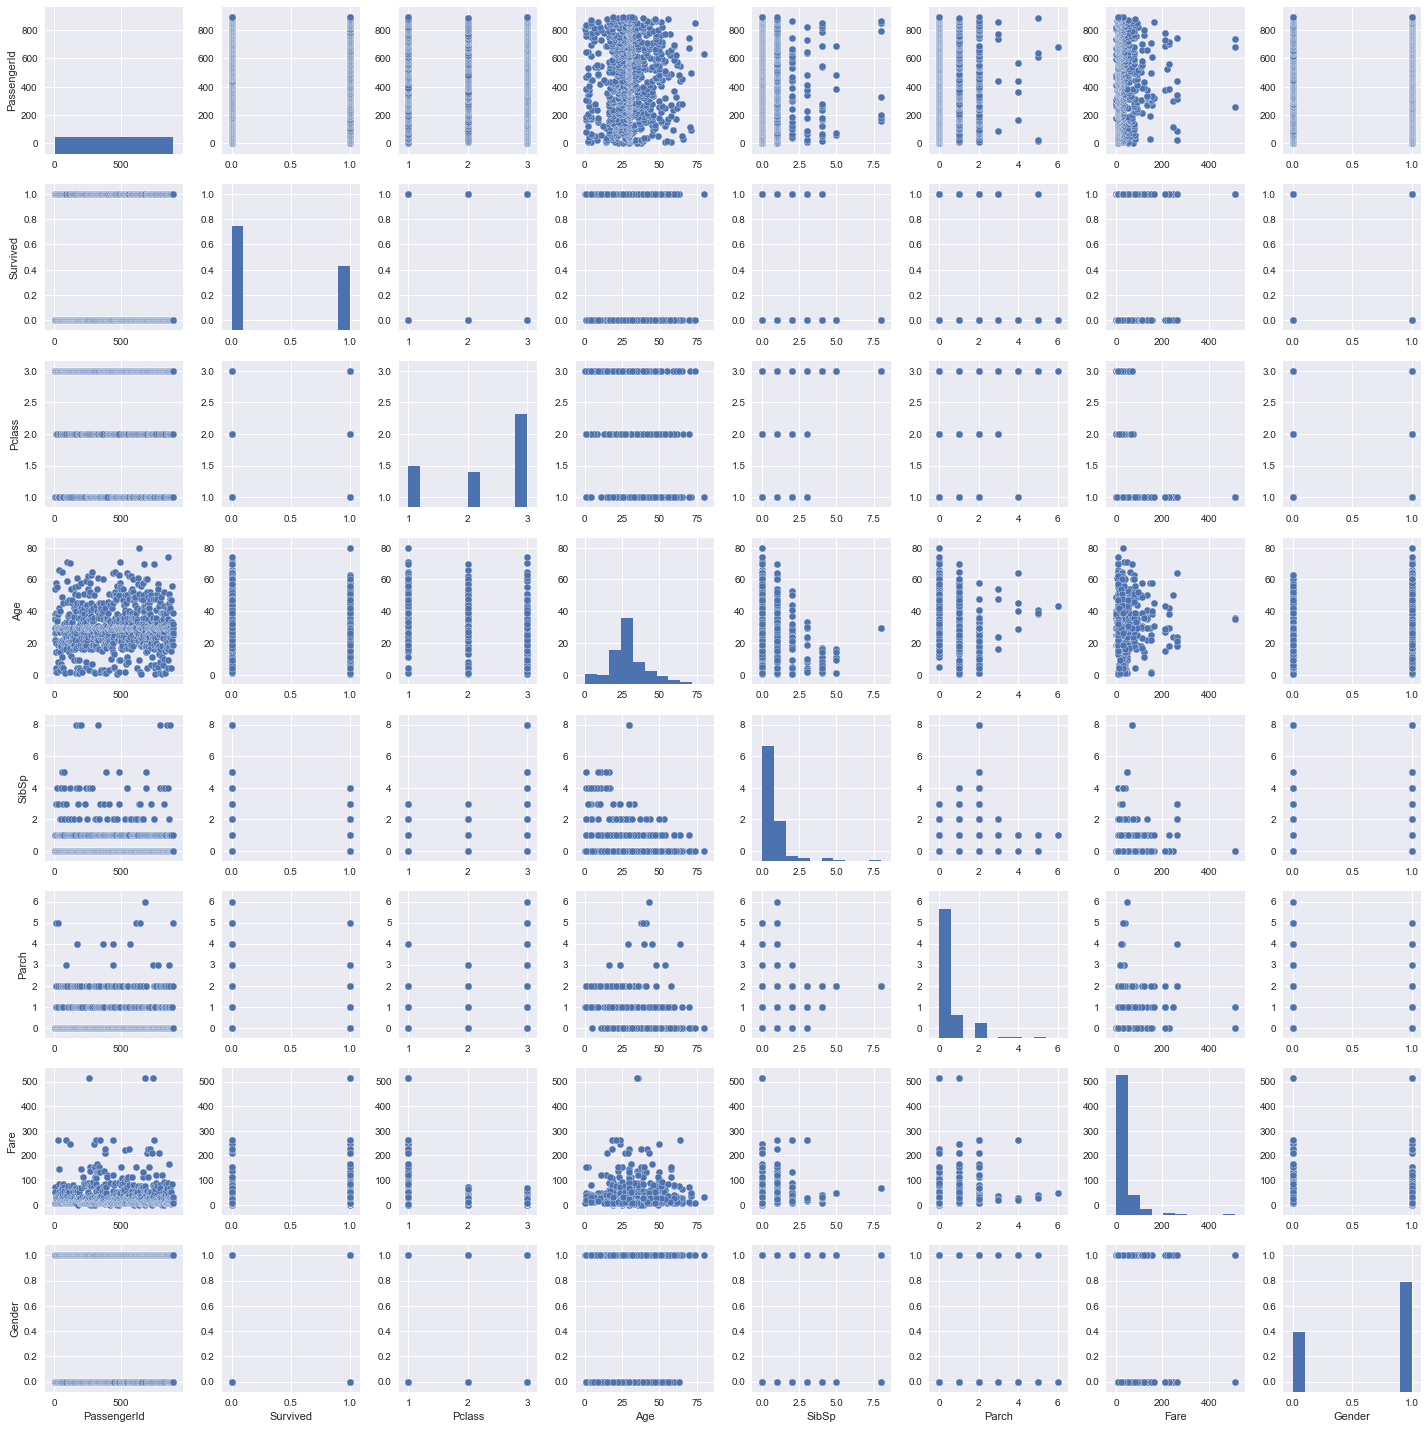

In [20]:
sns.pairplot(df)

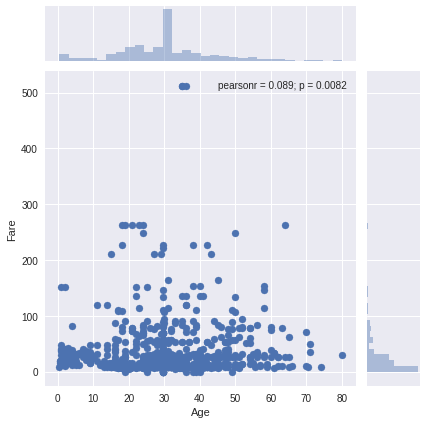

In [66]:
sns.jointplot(x='Age',y='Fare',data=df)

## Multivariate Analysis

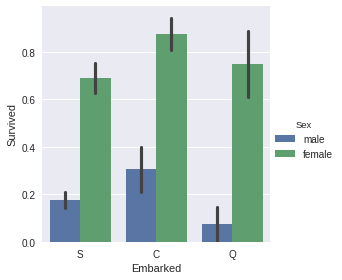

In [67]:
sns.factorplot(x='Embarked',y='Survived',hue='Sex',data=df,kind='bar')

## Pclass & Age vs Survival¶


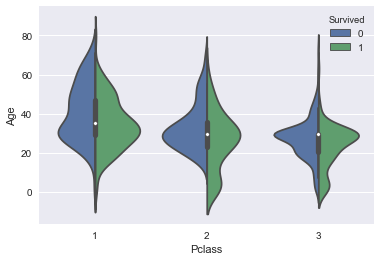

In [22]:
sns.violinplot(x='Pclass', y='Age', hue='Survived', data=df, split=True)

### Sex & Age vs Survival



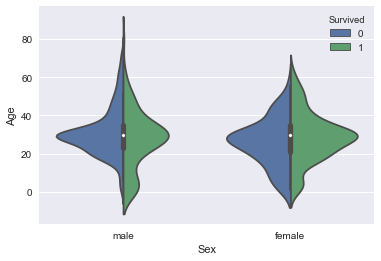

In [21]:
sns.violinplot(x='Sex', y='Age', hue='Survived', data=df, split=True)
